In [58]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [59]:
#read dataset
data = pd.read_csv(r'/Users/Wooppy-2/Anaconda3/envs/axiata/datasets/aps_failure_training_set2.csv')

In [60]:
#analyze columns/variables in dataset
data.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [61]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [62]:
#normalized the binary classifier attribute to 1 & 0
data['class']=np.where(data['class'] =='neg', '0', data['class'])
data['class']=np.where(data['class'] =='pos', '1', data['class'])

#replace na to 0
data = data.replace('na', 0)

In [63]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [64]:
data['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

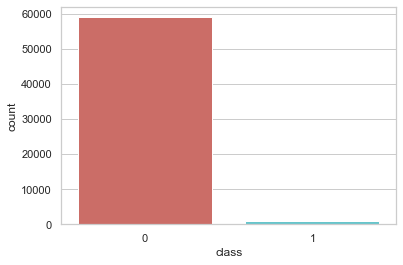

In [65]:
#create histogram to visualize the 'class' data
sns.countplot(x='class', data=data, palette='hls')
plt.show()

In [66]:
#analyze positive and negative case
count_neg = len(data[data['class']=='0'])
count_pos = len(data[data['class']=='1'])
count_total = count_neg + count_pos
pct_neg = count_neg/count_total
pct_pos = count_pos/count_total
print("Percentage of Postitive Case: " + str(pct_pos * 100) + "\n" + "Percentage of Negative Case: " + str(pct_neg * 100))

Percentage of Postitive Case: 1.6666666666666667
Percentage of Negative Case: 98.33333333333333


In [67]:
# implement SMOTE algorithm 
X = data.loc[:, data.columns != 'class']
y = data.loc[:, data.columns == 'class']    

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['class'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['class']=='0']))
print("Number of subscription",len(os_data_y[os_data_y['class']=='1']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['class']=='0'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['class']=='1'])/len(os_data_X))

C:\Users\Wooppy-2\Anaconda3\envs\axiata\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  94368
Number of no subscription in oversampled data 47184
Number of subscription 47184
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [68]:
#display statistic result 
X=os_data_X
y=os_data_y

est = sm.OLS(y.astype(float), X.astype(float)).fit()
print(est.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.869     
Dependent Variable: class            AIC:                10533.3734
Date:               2019-08-06 18:14 BIC:                12140.7162
No. Observations:   94368            Log-Likelihood:     -5096.7   
Df Model:           170              F-statistic:        3693.     
Df Residuals:       94198            Prob (F-statistic): 0.00      
R-squared:          0.870            Scale:              0.065346  
---------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
aa_000      0.0000     0.0000    55.2519   0.0000    0.0000    0.0000
ab_000      0.0075     0.0005    14.1521   0.0000    0.0065    0.0086
ac_000     -0.0000     0.0000    -5.4165   0.0000   -0.0000   -0.0000
ad_000     -0.0000     0.0000    -4.0545   0.0001   -0

In [69]:
#drop variables where p-value larger than 0.05
drop_vars=['ag_000', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'am_0'
           'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009',
           'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009',
           'bc_000', 'bh_000', 'bn_000', 'cf_000', 'cj_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003',
           'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_001', 'cs_002', 'cs_003', 'cs_004',
           'cs_005', 'cs_006', 'cs_007', 'cs_009', 'cy_000', 'dc_000', 'dj_000 ', 'dk_000', 'dl_000', 'dm_000',
           'dn_000', 'dr_000']
data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in drop_vars]

#assign valid dataset to new dataset variable
X=os_data_X[to_keep]
y=os_data_y['class']

In [70]:
#create model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Wooppy-2\Anaconda3\envs\axiata\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
#display model accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [72]:
#display confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9108  307]
 [ 464 8995]]


In [73]:
#display precision, recall and f1-score values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9415
           1       0.97      0.95      0.96      9459

    accuracy                           0.96     18874
   macro avg       0.96      0.96      0.96     18874
weighted avg       0.96      0.96      0.96     18874

